# Ensemble Clasifier for Leaf Classification

# Dataset creation

*Loading Dataset :*

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("../dataset/dataset.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Columns: 4097 entries, feature 1 to class
dtypes: float64(4096), object(1)
memory usage: 400.1+ MB


*Preprocessing Data :*

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
x = np.array(np.array(dataset)[:,:-1])
y = np.array(np.array(dataset)[:,-1])

In [6]:
x = StandardScaler().fit_transform(x)
y = LabelEncoder().fit_transform(y).reshape(-1,1)

In [7]:
x , y

(array([[-0.2225354 ,  1.54327676,  0.01576825, ..., -0.05114589,
          0.60305511, -0.03677779],
        [-0.63226473,  0.96815299,  0.18891568, ..., -0.05114589,
          0.60305598, -0.03677779],
        [-0.63935554,  1.64060614,  0.9507491 , ..., -0.05114589,
          0.60305598, -0.03677779],
        ...,
        [ 1.86237778,  0.6198227 ,  0.52441001, ..., -0.05114589,
          0.60302639, -0.03677779],
        [ 1.78054426,  1.17613076,  0.7875146 , ..., -0.05114589,
          0.60303596, -0.03677779],
        [-0.63891377,  0.58869335,  0.92574806, ..., -0.05114589,
          0.60164209, -0.03677779]]),
 array([[ 0],
        [ 0],
        [ 0],
        ...,
        [63],
        [63],
        [63]]))

In [8]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Model training and testing :

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.losses import SparseCategoricalCrossentropy

## DNN Classifier :

In [10]:
model = Sequential([
    Input((x.shape[1],)),
    Dense(16,activation='relu'),
    Dense(64,activation='softmax')
])
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        65,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,640 (260.31 KB)

 Trainable params: 66,640 (260.31 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(xtr,ytr,batch_size=16,epochs=200,validation_split=0.2,shuffle=True)

Epoch 1/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.1982 - loss: 3.3874 - val_accuracy: 0.4419 - val_loss: 1.8661
Epoch 2/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5245 - loss: 1.5698 - val_accuracy: 0.5547 - val_loss: 1.3847
Epoch 3/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.6380 - loss: 1.1114 - val_accuracy: 0.6025 - val_loss: 1.2065
Epoch 4/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7006 - loss: 0.9115 - val_accuracy: 0.6436 - val_loss: 1.1029
Epoch 5/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7565 - loss: 0.7615 - val_accuracy: 0.6729 - val_loss: 0.9966
Epoch 6/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7766 - loss: 0.6664 - val_accuracy: 0.6772 - val_loss: 1.0110
Epoch 7/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8056 - loss: 0.5908 - val_accuracy: 0.6812 - val_loss: 0.9650
Epoch 8/200
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8200 - loss: 0

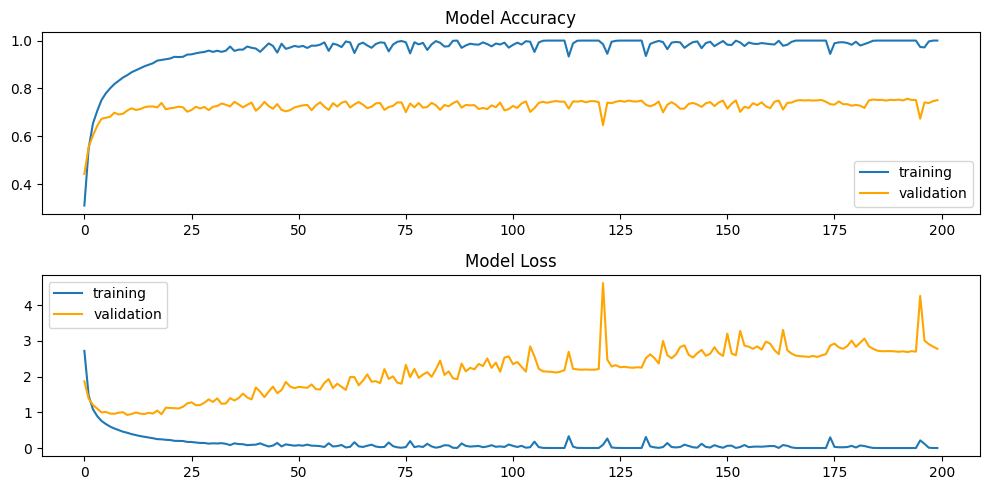

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='orange')
plt.title('Model Accuracy')
plt.legend(['training','validation'])
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model Loss')
plt.legend(['training','validation'])
plt.tight_layout()
plt.show()

In [13]:
ypredDense = model.predict(xte)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


In [14]:
ypredDenseRes = [np.argmax(i) for i in ypredDense]
ypredDense = np.array(ypredDenseRes)

DNN Classifier
Accuracy :  0.760546875
F1_score :  0.7611817240989032



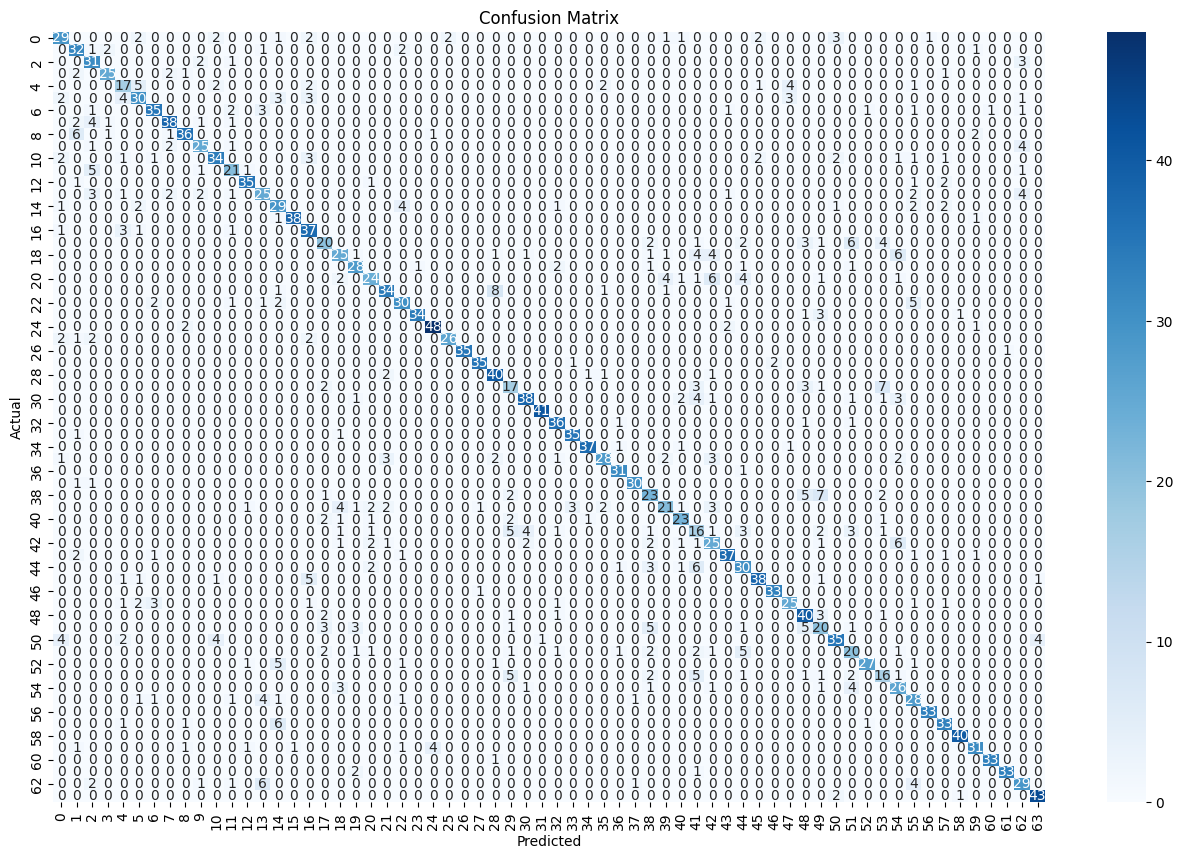


              precision    recall  f1-score   support

           0       0.69      0.63      0.66        46
           1       0.65      0.82      0.73        39
           2       0.61      0.84      0.70        37
           3       0.86      0.81      0.83        31
           4       0.55      0.50      0.52        34
           5       0.68      0.65      0.67        46
           6       0.81      0.76      0.79        46
           7       0.84      0.81      0.83        47
           8       0.88      0.77      0.82        47
           9       0.78      0.76      0.77        33
          10       0.79      0.71      0.75        48
          11       0.68      0.72      0.70        29
          12       0.90      0.88      0.89        40
          13       0.62      0.61      0.62        41
          14       0.59      0.69      0.64        42
          15       0.97      0.95      0.96        40
          16       0.67      0.86      0.76        43
          17       0.62   

In [26]:
print("DNN Classifier")
print("Accuracy : ",accuracy_score(yte, ypredDense))
print("F1_score : ",f1_score(yte, ypredDense, average='weighted'))
print()

cm = confusion_matrix(yte, ypredDense)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print(classification_report(yte, ypredDense))

## Voting Classifier :

In [16]:
svc = SVC(probability=True, kernel='poly')
rfc = RandomForestClassifier(n_estimators=10)
lrc = LogisticRegression()

In [17]:
vtc = VotingClassifier([('svc',svc),('rfc',rfc),('lrc',lrc)],voting='soft',n_jobs=-1)
vtc.fit(xtr, ytr)

/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

VotingClassifier(estimators=[('svc', SVC(kernel='poly', probability=True)),
                             ('rfc', RandomForestClassifier(n_estimators=10)),
                             ('lrc', LogisticRegression())],
                 n_jobs=-1, voting='soft')

In [18]:
ypredVTC = vtc.predict(xte)

Voting Classifier
Accuracy :  0.790234375
F1_score :  0.7901525824106823



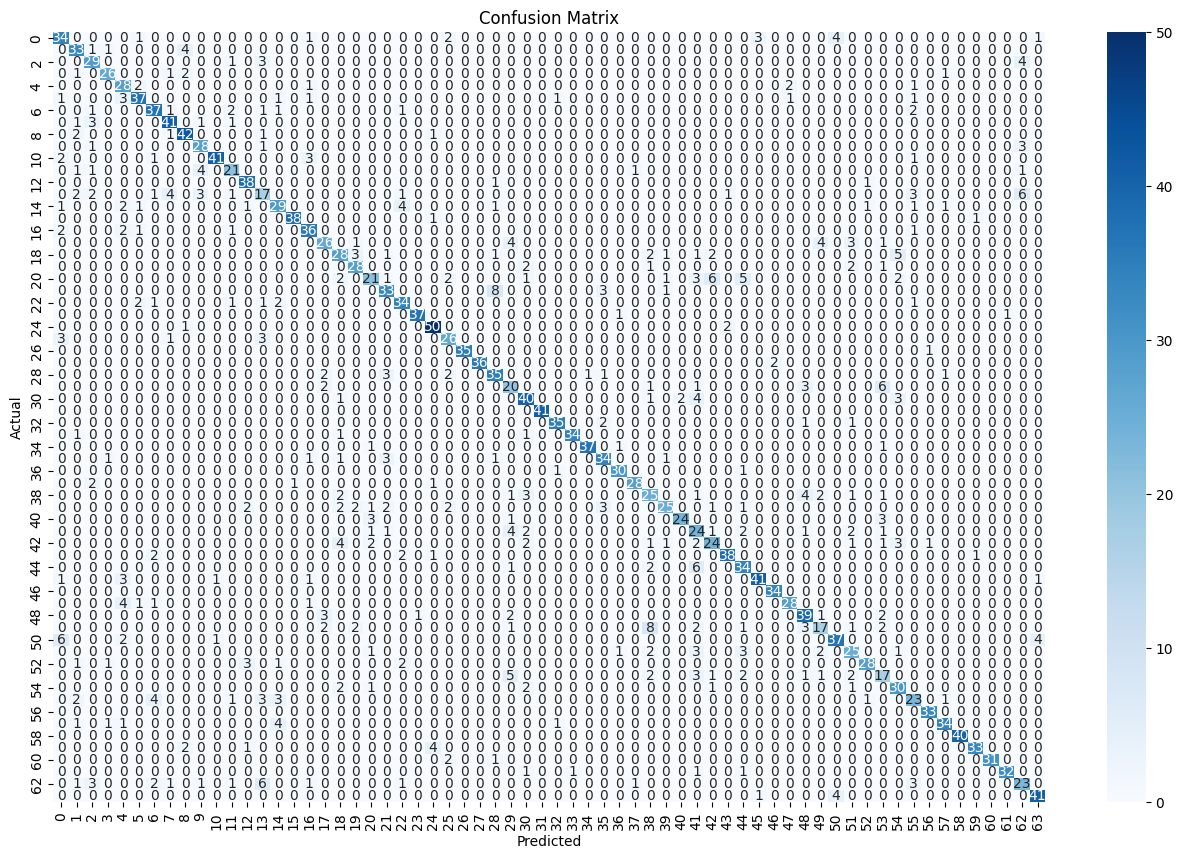


              precision    recall  f1-score   support

           0       0.68      0.74      0.71        46
           1       0.72      0.85      0.78        39
           2       0.67      0.78      0.72        37
           3       0.87      0.84      0.85        31
           4       0.62      0.82      0.71        34
           5       0.82      0.80      0.81        46
           6       0.76      0.80      0.78        46
           7       0.82      0.87      0.85        47
           8       0.82      0.89      0.86        47
           9       0.76      0.85      0.80        33
          10       0.95      0.85      0.90        48
          11       0.70      0.72      0.71        29
          12       0.84      0.95      0.89        40
          13       0.47      0.41      0.44        41
          14       0.71      0.69      0.70        42
          15       0.97      0.95      0.96        40
          16       0.78      0.84      0.81        43
          17       0.74   

In [19]:
print("Voting Classifier")
print("Accuracy : ",accuracy_score(yte, ypredVTC))
print("F1_score : ",f1_score(yte, ypredVTC, average='weighted'))
print()

cm = confusion_matrix(yte, ypredVTC)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print(classification_report(yte, ypredVTC))

## Bagging Classifier :

In [20]:
bgc = BaggingClassifier(rfc,n_estimators=10,oob_score=True,bootstrap=True,n_jobs=-1)
bgc.fit(xtr,ytr)

/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/opt/anaconda3/envs/stabilityTest/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
                  oob_score=True)

In [21]:
ypredBGC = bgc.predict(xte)

Bagging Classifier
Accuracy :  0.64296875
OOB eval :  0.59619140625
F1_score :  0.6405243865848101



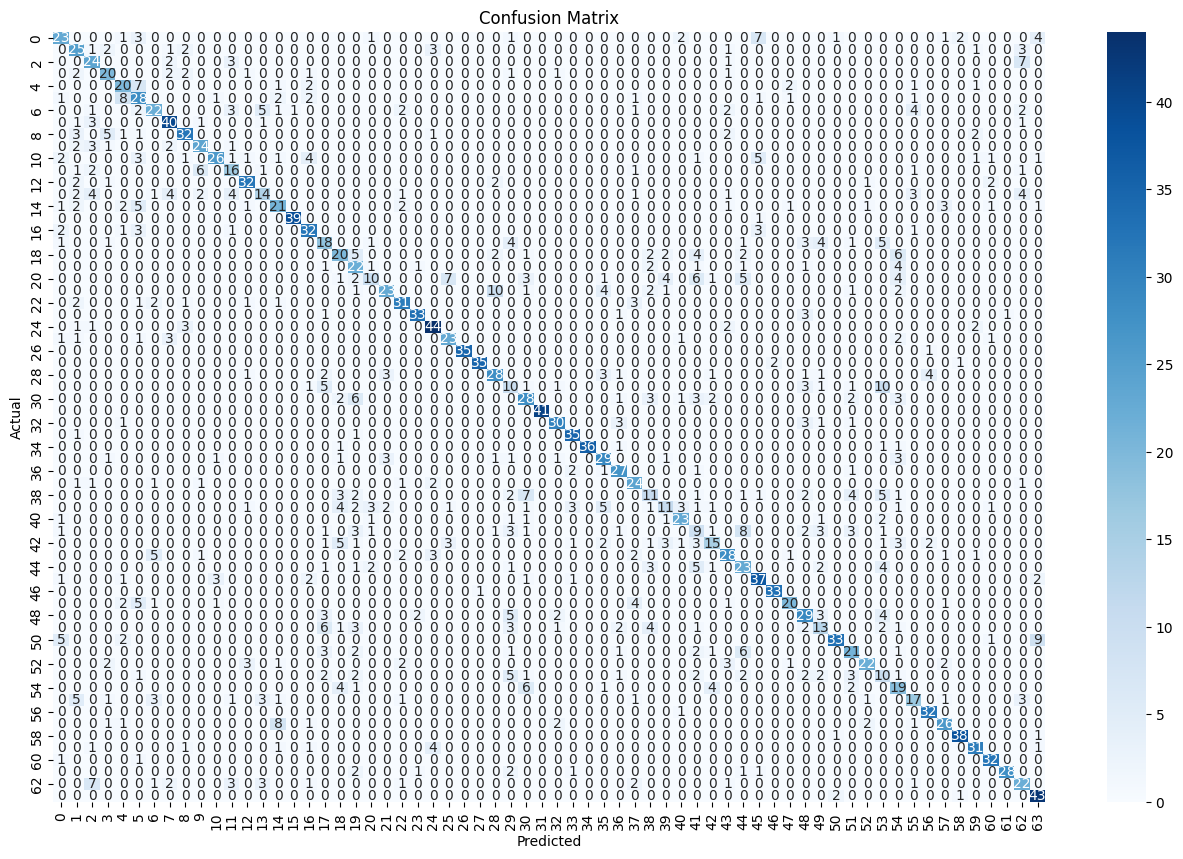


              precision    recall  f1-score   support

           0       0.57      0.50      0.53        46
           1       0.49      0.64      0.56        39
           2       0.50      0.65      0.56        37
           3       0.57      0.65      0.61        31
           4       0.50      0.59      0.54        34
           5       0.46      0.61      0.52        46
           6       0.61      0.48      0.54        46
           7       0.71      0.85      0.78        47
           8       0.76      0.68      0.72        47
           9       0.69      0.73      0.71        33
          10       0.81      0.54      0.65        48
          11       0.48      0.55      0.52        29
          12       0.78      0.80      0.79        40
          13       0.52      0.34      0.41        41
          14       0.55      0.50      0.53        42
          15       0.97      0.97      0.97        40
          16       0.68      0.74      0.71        43
          17       0.41   

In [22]:
print("Bagging Classifier")
print("Accuracy : ",accuracy_score(yte, ypredBGC))
print("OOB eval : ",bgc.oob_score_)
print("F1_score : ",f1_score(yte, ypredBGC, average='weighted'))
print()

cm = confusion_matrix(yte, ypredBGC)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print(classification_report(yte, ypredBGC))